# 1. 클러스터링

In [63]:
import pandas as pd
import numpy as np
import math

#Visualizing
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'; plt.rcParams['axes.unicode_minus'] = False;
import seaborn as sns; #sns.set_style('whitegrid')

#Time Series Analysis
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Clustering (+α)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from minisom import MiniSom


#System
from ipywidgets import interact
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')


In [64]:
%matplotlib inline

## 경기도 클러스터링

In [65]:
data = pd.read_csv('아파트매매가격지수_경기도.csv',index_col=0)
data = data.T
data

date,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,...,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01
수원시,63.4,63.3,63.2,63.3,63.4,63.5,63.4,63.2,63.2,63.4,...,97.3,100.0,102.4,104.7,106.5,108.4,109.5,109.8,109.8,109.6
성남시,67.8,67.2,66.9,67.1,67.5,67.9,67.7,67.4,67.4,67.5,...,99.1,100.0,101.3,102.6,103.6,104.3,104.8,105.1,105.1,105.0
의정부시,77.7,77.4,76.9,76.4,76.4,76.2,75.5,75.2,75.1,75.2,...,97.2,100.0,101.8,103.8,105.2,106.5,107.2,107.4,107.4,107.3
안양시,60.5,60.2,60.0,59.8,59.6,59.5,59.5,59.4,59.5,59.8,...,95.2,100.0,103.2,106.2,108.3,110.5,111.7,112.0,111.8,111.6
부천시,68.1,67.7,67.4,67.4,67.6,67.6,67.5,67.2,67.2,67.8,...,97.2,100.0,102.0,104.5,106.7,108.7,110.2,110.8,110.8,110.7
광명시,53.0,52.9,52.6,52.6,52.9,53.0,53.1,52.9,53.1,53.1,...,98.4,100.0,102.0,104.0,105.5,106.7,107.3,107.4,107.3,107.3
평택시,92.6,92.5,92.4,92.4,92.4,92.6,92.5,92.3,92.3,92.4,...,95.2,100.0,103.0,106.2,108.8,111.7,113.2,114.1,114.3,114.3
동두천시,92.6,90.9,90.1,90.0,89.8,89.6,89.3,89.0,88.9,89.0,...,97.2,100.0,102.0,104.5,106.4,107.3,107.7,107.5,107.5,107.4
안산시,66.8,66.6,66.3,66.3,66.6,66.8,66.7,66.5,66.6,66.9,...,95.0,100.0,102.8,105.0,107.1,109.3,110.7,111.2,111.3,111.3
고양시,69.5,69.0,68.6,68.1,68.1,68.0,67.9,67.9,68.1,68.5,...,98.5,100.0,101.4,103.1,105.0,106.7,107.6,108.0,108.1,108.0


In [66]:
# 클러스터 돌리기 전 변수를 생성 
df = data.copy()


## 군집 개수 정하기

### 1. elbow method 

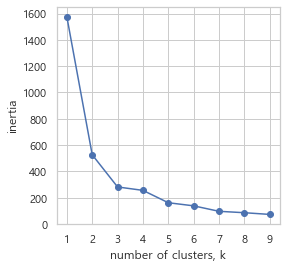

In [67]:
# 적절한 군집수 찾기 
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수) 
ks = range(1,10) 
inertias = [] 
for k in ks: 
    model = TimeSeriesKMeans(n_clusters=k, metric="dtw",random_state = 2022)
    model.fit(df) 
    inertias.append(model.inertia_) 
    # Plot ks vs inertias 
plt.figure(figsize=(4, 4)) 
plt.plot(ks, inertias, '-o') 
plt.xlabel('number of clusters, k') 
plt.ylabel('inertia') 
plt.xticks(ks) 
plt.show()



### 2. silhouette 계수

In [68]:
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('실루엣 계수')
    plt.show()


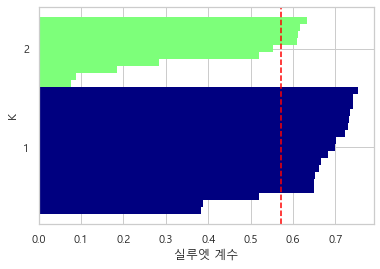

In [69]:
k= 2

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = TimeSeriesKMeans(n_clusters=k, metric="dtw",random_state = 2022)
y_km = km.fit_predict(df)
plotSilhouette(df, y_km)

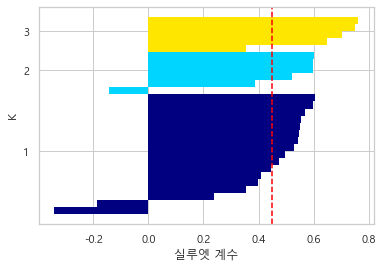

In [70]:
k= 3

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = TimeSeriesKMeans(n_clusters=k, metric="dtw",random_state = 2022)
y_km = km.fit_predict(df)
plotSilhouette(df, y_km)

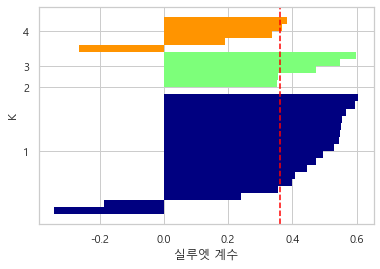

In [71]:
k= 4

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = TimeSeriesKMeans(n_clusters=k, metric="dtw",random_state = 2022)
y_km = km.fit_predict(df)
plotSilhouette(df, y_km)

## 클러스터별 저장

In [72]:
# K-Means 모델과 군집 예측값을 생성 
# 클러스터 모델 생성 파라미터는 원할 경우 추가 
model =  TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state = 2022)
                     # 클러스터 갯수 
                     # , n_init=10 
                     # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴 
                     # , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다 
                     #random_state = 42 # , algorithm='auto' ) 
 # 생성한 모델로 데이터를 학습시킴 
model.fit(df) # unsupervised learning 
# 결과 값을 변수에 저장 
df['cluster'] = model.fit_predict(df)
df

date,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,...,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,cluster
수원시,63.4,63.3,63.2,63.3,63.4,63.5,63.4,63.2,63.2,63.4,...,100.0,102.4,104.7,106.5,108.4,109.5,109.8,109.8,109.6,0
성남시,67.8,67.2,66.9,67.1,67.5,67.9,67.7,67.4,67.4,67.5,...,100.0,101.3,102.6,103.6,104.3,104.8,105.1,105.1,105.0,0
의정부시,77.7,77.4,76.9,76.4,76.4,76.2,75.5,75.2,75.1,75.2,...,100.0,101.8,103.8,105.2,106.5,107.2,107.4,107.4,107.3,2
안양시,60.5,60.2,60.0,59.8,59.6,59.5,59.5,59.4,59.5,59.8,...,100.0,103.2,106.2,108.3,110.5,111.7,112.0,111.8,111.6,0
부천시,68.1,67.7,67.4,67.4,67.6,67.6,67.5,67.2,67.2,67.8,...,100.0,102.0,104.5,106.7,108.7,110.2,110.8,110.8,110.7,0
광명시,53.0,52.9,52.6,52.6,52.9,53.0,53.1,52.9,53.1,53.1,...,100.0,102.0,104.0,105.5,106.7,107.3,107.4,107.3,107.3,0
평택시,92.6,92.5,92.4,92.4,92.4,92.6,92.5,92.3,92.3,92.4,...,100.0,103.0,106.2,108.8,111.7,113.2,114.1,114.3,114.3,1
동두천시,92.6,90.9,90.1,90.0,89.8,89.6,89.3,89.0,88.9,89.0,...,100.0,102.0,104.5,106.4,107.3,107.7,107.5,107.5,107.4,1
안산시,66.8,66.6,66.3,66.3,66.6,66.8,66.7,66.5,66.6,66.9,...,100.0,102.8,105.0,107.1,109.3,110.7,111.2,111.3,111.3,0
고양시,69.5,69.0,68.6,68.1,68.1,68.0,67.9,67.9,68.1,68.5,...,100.0,101.4,103.1,105.0,106.7,107.6,108.0,108.1,108.0,0


In [73]:
df.to_csv('경기도_clustered.csv',encoding='cp949')

In [74]:
df0= df.loc[df['cluster'] == 0]
df0.to_csv('cluster0.csv',encoding='cp949')
df0

date,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,...,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,cluster
수원시,63.4,63.3,63.2,63.3,63.4,63.5,63.4,63.2,63.2,63.4,...,100.0,102.4,104.7,106.5,108.4,109.5,109.8,109.8,109.6,0
성남시,67.8,67.2,66.9,67.1,67.5,67.9,67.7,67.4,67.4,67.5,...,100.0,101.3,102.6,103.6,104.3,104.8,105.1,105.1,105.0,0
안양시,60.5,60.2,60.0,59.8,59.6,59.5,59.5,59.4,59.5,59.8,...,100.0,103.2,106.2,108.3,110.5,111.7,112.0,111.8,111.6,0
부천시,68.1,67.7,67.4,67.4,67.6,67.6,67.5,67.2,67.2,67.8,...,100.0,102.0,104.5,106.7,108.7,110.2,110.8,110.8,110.7,0
광명시,53.0,52.9,52.6,52.6,52.9,53.0,53.1,52.9,53.1,53.1,...,100.0,102.0,104.0,105.5,106.7,107.3,107.4,107.3,107.3,0
안산시,66.8,66.6,66.3,66.3,66.6,66.8,66.7,66.5,66.6,66.9,...,100.0,102.8,105.0,107.1,109.3,110.7,111.2,111.3,111.3,0
고양시,69.5,69.0,68.6,68.1,68.1,68.0,67.9,67.9,68.1,68.5,...,100.0,101.4,103.1,105.0,106.7,107.6,108.0,108.1,108.0,0
과천시,63.4,63.1,63.2,64.5,64.8,64.6,64.3,64.0,64.0,64.5,...,100.0,100.8,101.8,102.3,102.6,103.1,103.5,103.4,103.4,0
구리시,58.9,58.3,58.0,58.1,58.3,58.4,58.3,58.2,58.2,58.6,...,100.0,101.2,102.7,104.0,105.3,106.2,106.4,106.3,106.3,0
남양주시,70.2,69.9,69.7,69.6,69.7,69.6,69.4,69.2,69.1,69.3,...,100.0,101.9,104.1,106.1,107.8,108.9,109.3,109.3,109.3,0


In [75]:
df1= df.loc[df['cluster'] == 1]

df1.to_csv('cluster1.csv',encoding='cp949')
df1


date,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,...,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,cluster
평택시,92.6,92.5,92.4,92.4,92.4,92.6,92.5,92.3,92.3,92.4,...,100.0,103.0,106.2,108.8,111.7,113.2,114.1,114.3,114.3,1
동두천시,92.6,90.9,90.1,90.0,89.8,89.6,89.3,89.0,88.9,89.0,...,100.0,102.0,104.5,106.4,107.3,107.7,107.5,107.5,107.4,1
이천시,89.2,89.4,89.7,90.1,90.4,90.6,90.7,90.8,91.0,91.5,...,100.0,101.6,103.3,105.3,107.8,110.3,112.3,113.3,114.2,1
안성시,92.6,92.8,92.8,93.5,93.8,94.1,94.3,94.4,94.7,95.3,...,100.0,103.7,106.9,109.9,112.6,114.8,116.1,116.9,117.0,1
여주시,102.8,102.8,102.7,102.7,103.6,103.8,103.9,103.8,103.8,104.3,...,100.0,101.1,102.4,103.5,105.2,106.6,107.2,107.1,107.1,1
포천시,93.6,93.6,93.6,93.9,94.7,95.1,94.7,94.2,93.8,94.1,...,100.0,101.6,103.7,105.8,107.3,108.4,109.0,109.2,109.3,1


In [76]:
df2= df.loc[df['cluster'] == 2]
df2.to_csv('cluster2.csv',encoding='cp949')
df2

date,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,2013-09-01,2013-10-01,...,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,cluster
의정부시,77.7,77.4,76.9,76.4,76.4,76.2,75.5,75.2,75.1,75.2,...,100.0,101.8,103.8,105.2,106.5,107.2,107.4,107.4,107.3,2
파주시,82.3,81.9,81.6,80.6,80.7,80.3,80.0,80.0,80.4,80.7,...,100.0,101.1,103.1,104.7,105.9,106.9,107.2,107.5,107.8,2
광주시,82.4,82.0,81.9,82.3,82.3,82.2,81.9,81.6,81.4,81.5,...,100.0,101.8,104.1,105.4,106.8,107.9,108.4,108.7,108.7,2
양주시,82.0,81.7,81.4,81.7,81.9,82.1,81.4,81.0,81.0,81.3,...,100.0,101.8,104.2,106.4,108.5,109.5,109.8,109.8,109.7,2
오산시,83.2,83.0,82.9,82.9,82.9,82.4,82.1,81.9,81.7,81.8,...,100.0,103.5,107.3,110.7,114.1,115.9,116.7,116.8,116.6,2


## 클러스터별 상관관계

In [77]:
data_S = pd.read_csv('경기도변수.csv',index_col = 0)
data_S


,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
date,,,,,,,,,,,,,,,,
2013-01-01,73.5,64.75625,93.900000,80.1,102.868,92.728,5.78,82.689331,76.007636,1089.0,1841.1,1961.90,503.67,8413721.0,54632,13631
2013-02-01,73.2,64.42500,93.666667,79.8,90.009,93.038,5.66,82.871183,76.108044,1083.0,1857.1,2026.50,535.87,7268443.0,65640,14925
2013-03-01,73.1,64.22500,93.550000,79.6,101.388,92.952,5.54,83.162722,76.376687,1111.0,1862.4,2004.90,555.02,10160177.0,87563,17718
2013-04-01,73.2,64.30000,93.766667,79.5,101.295,92.823,5.42,83.554044,76.858189,1101.0,1867.7,1964.00,563.87,9757932.0,106498,22790
2013-05-01,73.4,64.49375,94.116667,79.6,102.313,92.823,5.24,83.797077,77.090528,1129.7,1870.3,2001.05,577.87,10837979.0,120393,25910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,103.5,107.45625,108.650000,108.8,114.800,103.350,3.47,102.450935,103.903947,1168.6,3543.4,2970.68,992.33,14689855.0,119686,29187
2021-11-01,104.1,108.45625,110.166667,109.8,119.300,103.870,3.58,102.917900,104.543227,1187.9,3594.7,2839.01,965.63,14483042.0,111172,26593
2021-12-01,104.4,108.79375,111.033333,110.2,126.700,104.040,3.68,103.178314,104.798091,1188.8,3620.1,2977.65,1033.98,19169150.0,101766,25669


In [78]:
sns.set(style="whitegrid", font_scale=1, font='Malgun Gothic')
%matplotlib inline

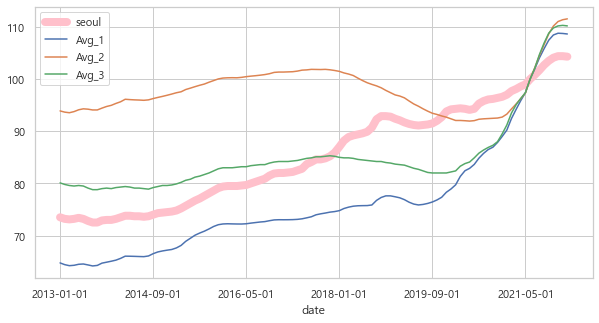

In [80]:
data_S['seoul'].plot(figsize=(10, 5),color='pink',lw=8)
data_S['Avg_1'].plot(figsize=(10, 5))
data_S['Avg_2'].plot(figsize=(10, 5))
data_S['Avg_3'].plot(figsize=(10, 5))
plt.legend()

In [81]:
data_S.corr()

,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
seoul,1.000000,0.909367,0.227910,0.773868,0.655650,0.985362,-0.788762,0.821937,0.833499,0.511194,0.983945,0.713424,0.804257,0.120689,0.277253,0.461072
Avg_1,0.909367,1.000000,0.430139,0.952320,0.659035,0.914310,-0.738248,0.859271,0.864163,0.454030,0.950728,0.825427,0.851910,0.213492,0.145921,0.223406
Avg_2,0.227910,0.430139,1.000000,0.636631,0.263814,0.316192,-0.263846,0.629858,0.605018,0.122268,0.258434,0.404361,0.410531,0.467495,-0.122293,-0.113604
Avg_3,0.773868,0.952320,0.636631,1.000000,0.617700,0.802606,-0.595459,0.829918,0.825010,0.352483,0.825879,0.833771,0.805576,0.255809,-0.000097,0.046835
MMI,0.655650,0.659035,0.263814,0.617700,1.000000,0.643640,-0.508876,0.590326,0.592166,0.225834,0.660918,0.590472,0.575644,0.370323,0.317967,0.355939
CPI,0.985362,0.914310,0.316192,0.802606,0.643640,1.000000,-0.788664,0.860513,0.867821,0.477902,0.977648,0.736793,0.800200,0.135486,0.252717,0.434781
대출금리,-0.788762,-0.738248,-0.263846,-0.595459,-0.508876,-0.788664,1.000000,-0.883444,-0.897772,-0.557470,-0.827397,-0.575287,-0.730375,-0.416933,-0.542016,-0.611001
전세가격지수 전국,0.821937,0.859271,0.629858,0.829918,0.590326,0.860513,-0.883444,1.000000,0.998765,0.444093,0.854004,0.738510,0.832382,0.455081,0.319727,0.411201
전세가격지수 경기도,0.833499,0.864163,0.605018,0.825010,0.592166,0.867821,-0.897772,0.998765,1.000000,0.466121,0.866091,0.732316,0.833379,0.448879,0.337487,0.429138
환율,0.511194,0.454030,0.122268,0.352483,0.225834,0.477902,-0.557470,0.444093,0.466121,1.000000,0.525141,0.032797,0.228263,0.166043,0.125236,0.225640


<AxesSubplot:>

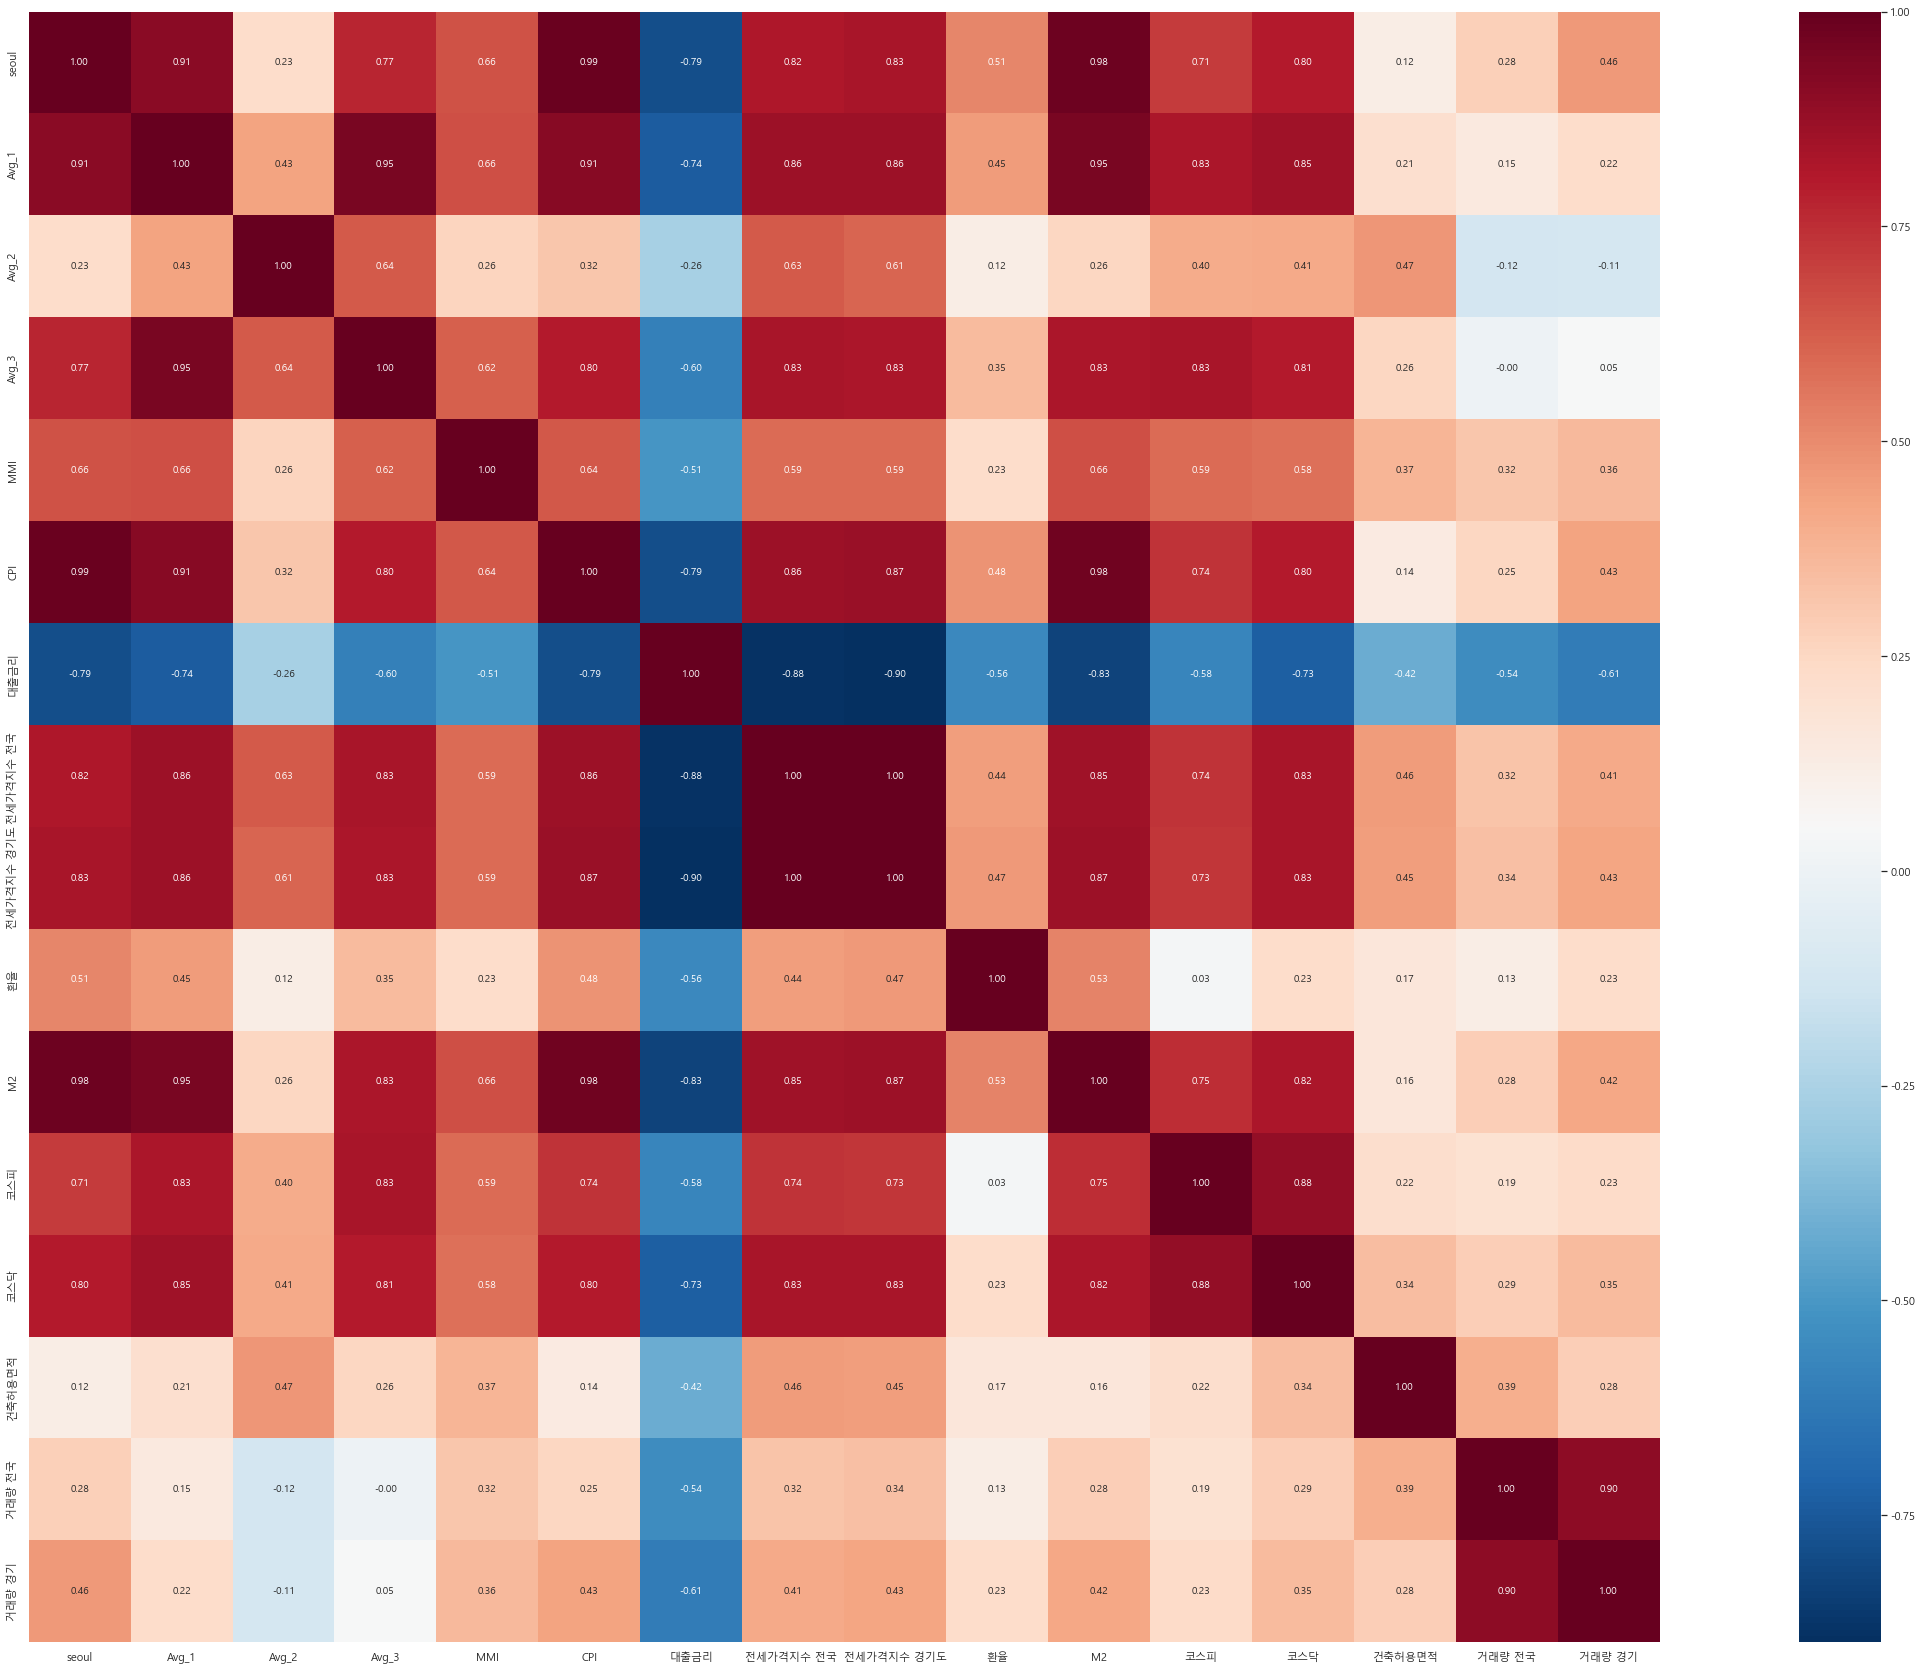

In [82]:
fig=plt.gcf()
fig.set_size_inches(50,30)
sns.heatmap(data_S.corr(), cmap='RdBu_r', square=True, cbar=True, annot=True, fmt=".2f")

In [83]:
data_S[-60:].corr()

,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
seoul,1.000000,0.914074,0.162113,0.778967,0.484390,0.953901,-0.649452,0.661441,0.685418,0.421768,0.965947,0.532433,0.649717,0.019340,-0.260421,-0.375997
Avg_1,0.914074,1.000000,0.444448,0.953181,0.545531,0.946294,-0.695954,0.892828,0.910877,0.312946,0.955095,0.740141,0.752513,0.234154,-0.278689,-0.469124
Avg_2,0.162113,0.444448,1.000000,0.688014,0.276546,0.362679,0.152228,0.739523,0.702178,-0.150574,0.181457,0.478340,0.391523,0.477033,-0.443095,-0.509136
Avg_3,0.778967,0.953181,0.688014,1.000000,0.539197,0.877382,-0.524927,0.974152,0.975126,0.180529,0.827672,0.785775,0.748933,0.355525,-0.364386,-0.543732
MMI,0.484390,0.545531,0.276546,0.539197,1.000000,0.498143,-0.376577,0.517342,0.521570,0.026135,0.510715,0.462116,0.447937,0.548212,0.012768,-0.129542
CPI,0.953901,0.946294,0.362679,0.877382,0.498143,1.000000,-0.578406,0.779714,0.792576,0.398605,0.945085,0.603848,0.653566,0.071685,-0.358744,-0.472736
대출금리,-0.649452,-0.695954,0.152228,-0.524927,-0.376577,-0.578406,1.000000,-0.508764,-0.562854,-0.272354,-0.768706,-0.596377,-0.564012,-0.093461,-0.259833,-0.028457
전세가격지수 전국,0.661441,0.892828,0.739523,0.974152,0.517342,0.779714,-0.508764,1.000000,0.996633,0.005207,0.728791,0.852300,0.780746,0.431121,-0.290328,-0.484602
전세가격지수 경기도,0.685418,0.910877,0.702178,0.975126,0.521570,0.792576,-0.562854,0.996633,1.000000,0.044899,0.760173,0.844625,0.780565,0.419683,-0.258171,-0.466309
환율,0.421768,0.312946,-0.150574,0.180529,0.026135,0.398605,-0.272354,0.005207,0.044899,1.000000,0.450574,-0.281556,-0.267876,-0.263308,-0.182151,-0.193190


In [84]:
data_S[-54:].corr()

,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
seoul,1.000000,0.943209,0.343421,0.844548,0.500929,0.953324,-0.682334,0.761131,0.784039,0.425145,0.970552,0.573473,0.584281,0.133964,-0.227688,-0.458003
Avg_1,0.943209,1.000000,0.544345,0.962216,0.538020,0.949822,-0.687558,0.920349,0.936863,0.290455,0.958390,0.749230,0.725165,0.305053,-0.253941,-0.500635
Avg_2,0.343421,0.544345,1.000000,0.745939,0.322879,0.514639,0.121892,0.769161,0.733328,-0.127403,0.306045,0.515135,0.508382,0.467507,-0.512225,-0.553268
Avg_3,0.844548,0.962216,0.745939,1.000000,0.535405,0.910294,-0.512943,0.978970,0.979036,0.164271,0.852040,0.785102,0.751348,0.396585,-0.361160,-0.568526
MMI,0.500929,0.538020,0.322879,0.535405,1.000000,0.495478,-0.363861,0.522786,0.526375,0.010579,0.507553,0.467530,0.436474,0.602733,0.062486,-0.110021
CPI,0.953324,0.949822,0.514639,0.910294,0.495478,1.000000,-0.571347,0.840320,0.850526,0.385214,0.933514,0.625483,0.595767,0.164231,-0.340272,-0.530836
대출금리,-0.682334,-0.687558,0.121892,-0.512943,-0.363861,-0.571347,1.000000,-0.507873,-0.561601,-0.256773,-0.783042,-0.593550,-0.549326,-0.124899,-0.305952,-0.039943
전세가격지수 전국,0.761131,0.920349,0.769161,0.978970,0.522786,0.840320,-0.507873,1.000000,0.996670,-0.001794,0.780842,0.854412,0.815076,0.454004,-0.297273,-0.505489
전세가격지수 경기도,0.784039,0.936863,0.733328,0.979036,0.526375,0.850526,-0.561601,0.996670,1.000000,0.037194,0.811570,0.845982,0.811743,0.444029,-0.262968,-0.487131
환율,0.425145,0.290455,-0.127403,0.164271,0.010579,0.385214,-0.256773,-0.001794,0.037194,1.000000,0.441325,-0.301272,-0.339589,-0.260522,-0.170047,-0.196253


In [85]:
data_S[-48:].corr()

,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
seoul,1.000000,0.981992,0.600982,0.933081,0.512527,0.954197,-0.676934,0.905964,0.927536,0.290805,0.973509,0.719033,0.666661,0.357392,-0.205174,-0.454402
Avg_1,0.981992,1.000000,0.671144,0.973664,0.533254,0.956291,-0.661035,0.959077,0.973340,0.197956,0.965018,0.799575,0.761029,0.423080,-0.234862,-0.482570
Avg_2,0.600982,0.671144,1.000000,0.816429,0.413786,0.715024,0.063070,0.800229,0.766332,-0.040549,0.479935,0.524174,0.556485,0.449599,-0.563487,-0.616736
Avg_3,0.933081,0.973664,0.816429,1.000000,0.544857,0.953915,-0.495353,0.986604,0.985341,0.115732,0.888431,0.800648,0.771829,0.464358,-0.353940,-0.559045
MMI,0.512527,0.533254,0.413786,0.544857,1.000000,0.503643,-0.334205,0.554576,0.553846,-0.101419,0.496785,0.510852,0.486712,0.689851,0.062615,-0.096860
CPI,0.954197,0.956291,0.715024,0.953915,0.503643,1.000000,-0.529751,0.925719,0.932773,0.261515,0.920337,0.716519,0.648352,0.328449,-0.328709,-0.524168
대출금리,-0.676934,-0.661035,0.063070,-0.495353,-0.334205,-0.529751,1.000000,-0.518773,-0.571370,-0.168284,-0.773277,-0.625434,-0.576807,-0.200348,-0.355131,-0.084273
전세가격지수 전국,0.905964,0.959077,0.800229,0.986604,0.554576,0.925719,-0.518773,1.000000,0.996775,-0.015951,0.861548,0.856996,0.835982,0.489850,-0.298795,-0.507954
전세가격지수 경기도,0.927536,0.973340,0.766332,0.985341,0.553846,0.932773,-0.571370,0.996775,1.000000,0.021502,0.891023,0.849305,0.833883,0.480625,-0.262825,-0.488092
환율,0.290805,0.197956,-0.040549,0.115732,-0.101419,0.261515,-0.168284,-0.015951,0.021502,1.000000,0.333382,-0.319031,-0.371426,-0.221905,-0.139450,-0.162384


In [86]:
data_S[-24:].corr()

,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
seoul,1.000000,0.993523,0.977323,0.995580,0.560212,0.974615,0.299458,0.982490,0.987246,0.019088,0.988253,0.645643,0.662476,0.500043,-0.671924,-0.747201
Avg_1,0.993523,1.000000,0.960869,0.998485,0.557751,0.967218,0.230531,0.991839,0.992599,-0.032999,0.994718,0.709956,0.710268,0.521160,-0.644390,-0.722735
Avg_2,0.977323,0.960869,1.000000,0.971437,0.491959,0.952910,0.465142,0.931903,0.938009,0.215285,0.949665,0.493541,0.517117,0.460982,-0.712223,-0.766220
Avg_3,0.995580,0.998485,0.971437,1.000000,0.548437,0.972549,0.269841,0.989070,0.990213,0.007869,0.992341,0.680574,0.677703,0.508021,-0.660376,-0.731129
MMI,0.560212,0.557751,0.491959,0.548437,1.000000,0.504838,-0.026194,0.582959,0.583787,-0.331002,0.555289,0.520902,0.564241,0.790602,-0.102622,-0.171990
CPI,0.974615,0.967218,0.952910,0.972549,0.504838,1.000000,0.365153,0.966671,0.967635,0.038708,0.974289,0.616093,0.589586,0.426842,-0.714403,-0.770779
대출금리,0.299458,0.230531,0.465142,0.269841,-0.026194,0.365153,1.000000,0.180123,0.188626,0.759298,0.238593,-0.443545,-0.424063,-0.018448,-0.510443,-0.468787
전세가격지수 전국,0.982490,0.991839,0.931903,0.989070,0.582959,0.966671,0.180123,1.000000,0.998776,-0.125367,0.993728,0.759183,0.741478,0.508755,-0.623476,-0.703254
전세가격지수 경기도,0.987246,0.992599,0.938009,0.990213,0.583787,0.967635,0.188626,0.998776,1.000000,-0.116028,0.994202,0.743315,0.738933,0.506618,-0.626344,-0.709080
환율,0.019088,-0.032999,0.215285,0.007869,-0.331002,0.038708,0.759298,-0.125367,-0.116028,1.000000,-0.069628,-0.632516,-0.605289,-0.173234,-0.377160,-0.269148


In [87]:
data_S[-12:].corr()

,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
seoul,1.000000,0.994531,0.999155,0.998441,0.074254,0.914045,0.798131,0.999201,0.999214,0.948068,0.985156,-0.743689,-0.303430,-0.101980,-0.933166,-0.935808
Avg_1,0.994531,1.000000,0.993325,0.997756,0.041698,0.881872,0.749314,0.992415,0.990810,0.929179,0.974303,-0.682176,-0.237836,-0.117758,-0.901381,-0.906074
Avg_2,0.999155,0.993325,1.000000,0.997365,0.054995,0.924823,0.811900,0.999684,0.998465,0.953230,0.989388,-0.753229,-0.322755,-0.125022,-0.942786,-0.944749
Avg_3,0.998441,0.997756,0.997365,1.000000,0.049477,0.899114,0.770652,0.996468,0.996989,0.944694,0.978231,-0.719050,-0.275431,-0.118252,-0.919159,-0.921714
MMI,0.074254,0.041698,0.054995,0.049477,1.000000,-0.086825,-0.022614,0.064045,0.075441,0.024706,0.020736,0.046606,0.343551,0.836280,-0.020089,-0.000730
CPI,0.914045,0.881872,0.924823,0.899114,-0.086825,1.000000,0.959655,0.926383,0.920083,0.923019,0.958288,-0.901212,-0.612399,-0.274284,-0.983664,-0.986192
대출금리,0.798131,0.749314,0.811900,0.770652,-0.022614,0.959655,1.000000,0.817739,0.806632,0.809290,0.872804,-0.903730,-0.693657,-0.229283,-0.930673,-0.940000
전세가격지수 전국,0.999201,0.992415,0.999684,0.996468,0.064045,0.926383,0.817739,1.000000,0.998618,0.949070,0.990731,-0.756889,-0.326645,-0.117214,-0.942739,-0.946157
전세가격지수 경기도,0.999214,0.990810,0.998465,0.996989,0.075441,0.920083,0.806632,0.998618,1.000000,0.952279,0.984464,-0.760865,-0.320764,-0.107809,-0.937840,-0.939948
환율,0.948068,0.929179,0.953230,0.944694,0.024706,0.923019,0.809290,0.949070,0.952279,1.000000,0.939725,-0.816405,-0.431964,-0.195514,-0.959207,-0.929495
